<a href="https://colab.research.google.com/github/Akshithraj/WEBSITE_ANALYSIS/blob/main/Another_copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

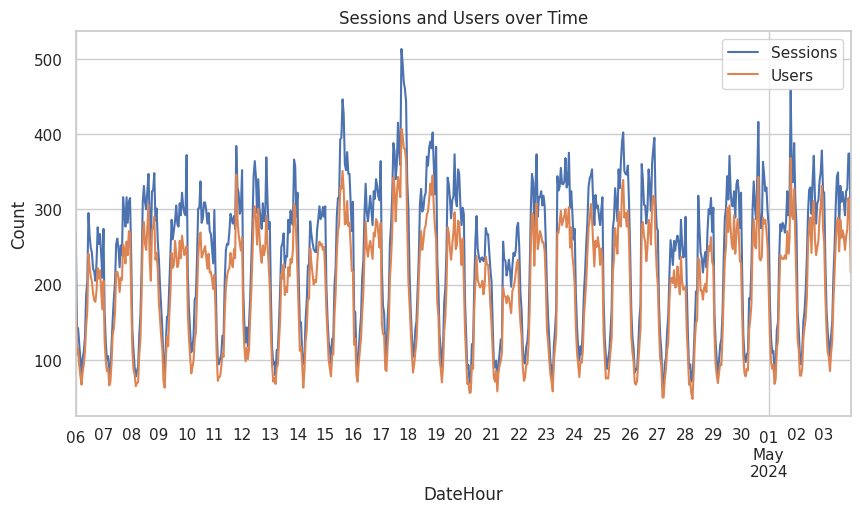

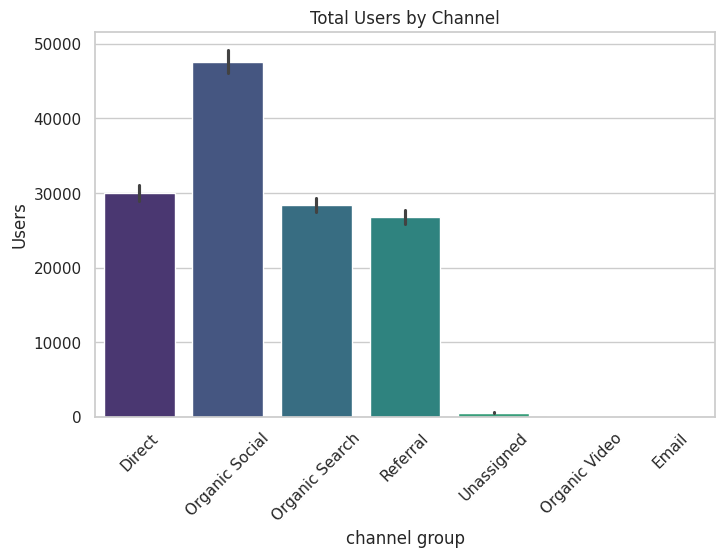

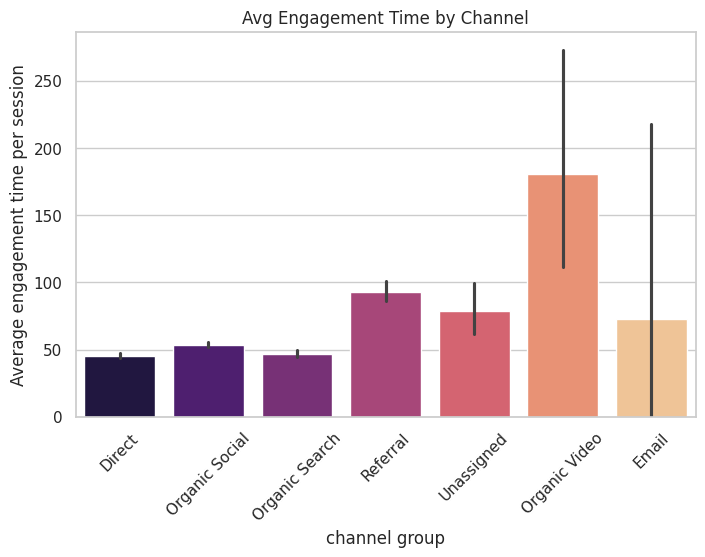

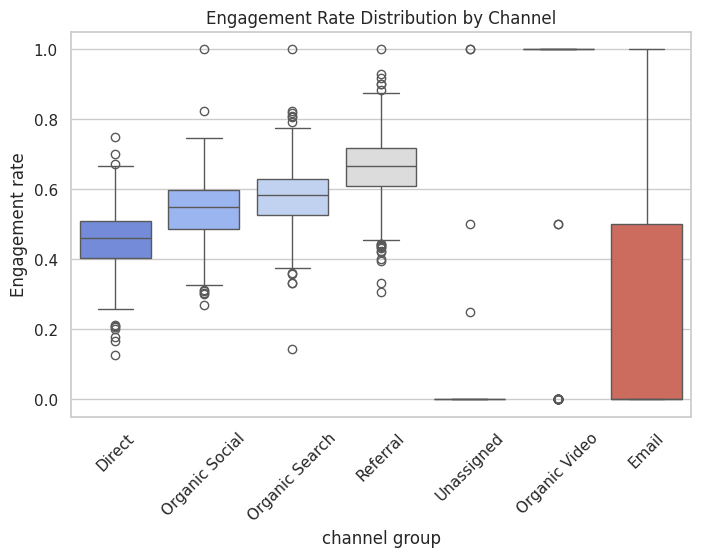

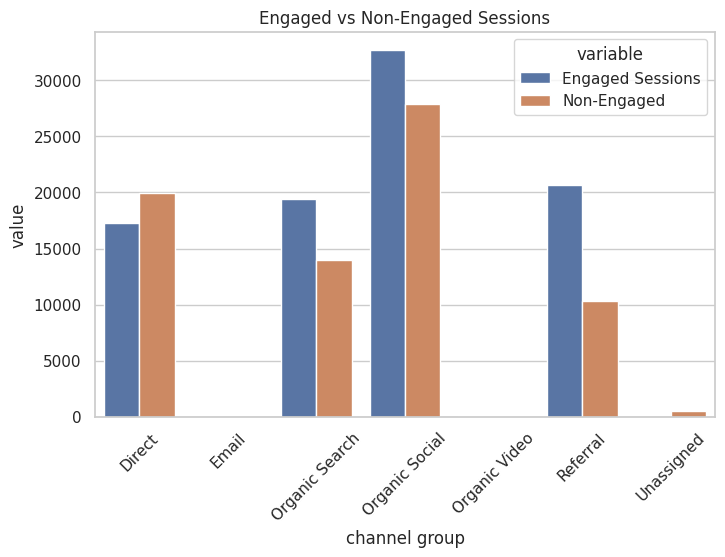

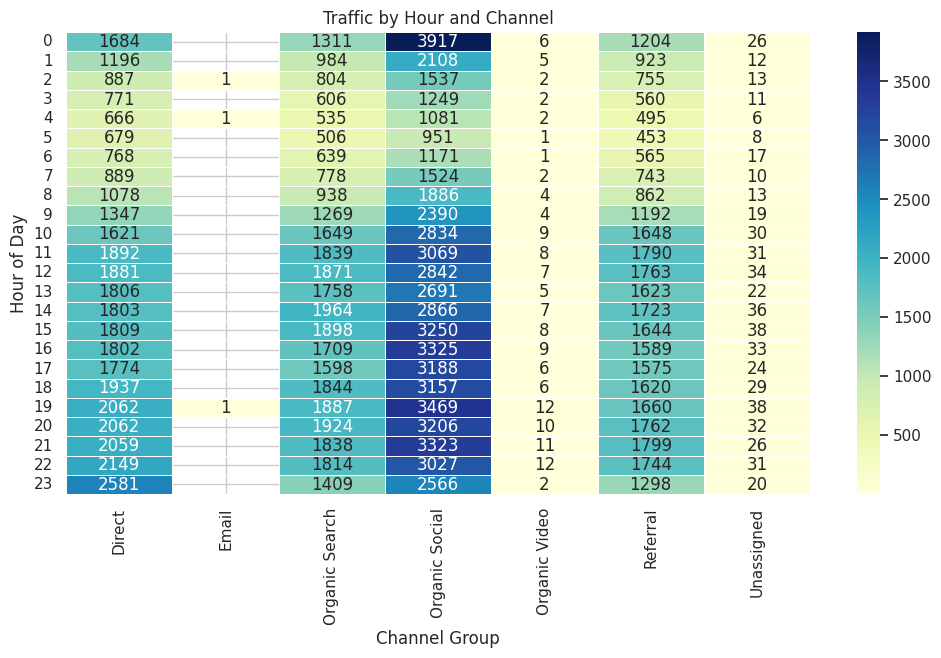

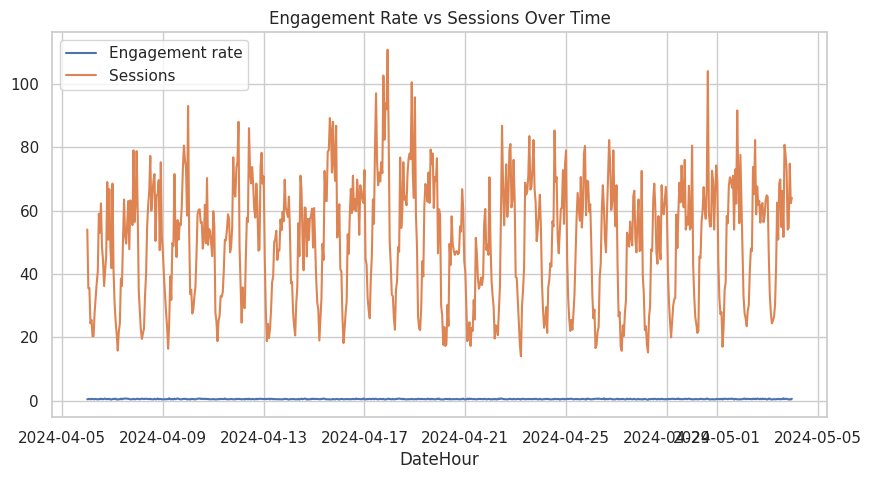

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/sample_data/data-export.csv')


# Fix header
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)

# Rename columns
df.columns = [
    "channel group",
    "DateHour",
    "Users",
    "Sessions",
    "Engaged Sessions",
    "Average engagement time per session",
    "Engaged sessions per user",
    "Events per session",
    "Engagement rate",
    "Event count"
]

# Convert DateHour to datetime
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors="coerce")

# Convert numeric columns
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Extract hour
df["Hour"] = df["DateHour"].dt.hour

# -----------------------------
# Sessions and Users over time
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over Time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

# -----------------------------
# Total users by channel
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="channel group",
    y="Users",
    estimator=np.sum,
    hue="channel group",
    legend=False,
    palette="viridis"
)
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Average engagement time by channel
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="channel group",
    y="Average engagement time per session",
    estimator=np.mean,
    hue="channel group",
    legend=False,
    palette="magma"
)
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Engagement rate distribution
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="channel group",
    y="Engagement rate",
    hue="channel group",
    legend=False,
    palette="coolwarm"
)
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Engaged vs Non-engaged sessions
session_df = df.groupby("channel group")[["Sessions", "Engaged Sessions"]].sum()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]

session_df_melted = session_df.reset_index().melt(
    id_vars="channel group",
    value_vars=["Engaged Sessions", "Non-Engaged"]
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=session_df_melted,
    x="channel group",
    y="value",
    hue="variable"
)
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Traffic by hour and channel
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

# -----------------------------
# Engagement rate vs sessions over time
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.show()

